# NN1 Bazowa implementacja

#### Magdalena Jeczeń

Wczytanie danych

In [1]:
import numpy as np
from parso import normalizer

train_data_sq_s = np.genfromtxt('./mio1/regression/square-simple-training.csv', delimiter=',', skip_header=1)
test_data_sq_s = np.genfromtxt('./mio1/regression/square-simple-test.csv', delimiter=',', skip_header=1)
train_data_sq_s = train_data_sq_s[:, 1:]
test_data_sq_s = test_data_sq_s[:, 1:]

In [2]:
X_train_sq_s = train_data_sq_s[:, :-1]
y_train_sq_s = train_data_sq_s[:, -1].reshape(-1, 1)
X_test_sq_s = test_data_sq_s[:, :-1]
y_test_sq_s = test_data_sq_s[:, -1].reshape(-1, 1)

In [3]:
train_data_st_l = np.genfromtxt('./mio1/regression/steps-large-training.csv', delimiter=',', skip_header=1)
test_data_st_l = np.genfromtxt('./mio1/regression/steps-large-test.csv', delimiter=',', skip_header=1)
train_data_st_l = train_data_st_l[:, 1:]
test_data_st_l = test_data_st_l[:, 1:]

In [4]:
X_train_st_l = train_data_st_l[:, :-1]
y_train_st_l = train_data_st_l[:, -1].reshape(-1, 1)
X_test_st_l = test_data_st_l[:, :-1]
y_test_st_l = test_data_st_l[:, -1].reshape(-1, 1)

In [5]:
import warnings
warnings.filterwarnings('ignore')

Aby dokładniej zwizualizować sobie, jak zachowuje się funkcja sigmoidalna oraz kombinacja liniowa takich funkcji, problemy z jedną warstwą ukrytą rozwiązywałam za pomocą klasy NeuralNetworkForVisuals. Na samym końcu, przed rozwiązaniem problemu z 2 ukrytymi warstwami, podana zostanie właściwa, wymagana w zadaniu klasa NeuralNetwork.

In [6]:
class NeuralNetworkForVisuals:
    def __init__(self, input_size, hidden_size, output_size, hidden_weights=None, hidden_bias=None, output_weights=None, output_bias=None):
        self.hidden_weights = hidden_weights
        self.hidden_bias = hidden_bias 
        self.output_weights = output_weights
        self.output_bias = output_bias

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def linear(self, x):
        return x

    def forward(self, X):
        hidden_layer_input = np.dot(X, self.hidden_weights) + self.hidden_bias
        hidden_layer_output = self.sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.output_weights) + self.output_bias
        output_layer_output = self.linear(output_layer_input)

        return output_layer_output, hidden_layer_output
    


Funkcje pomocnicze

In [7]:
import matplotlib.pyplot as plt
def plot(X,Y, title): # funkcja służąca do tworzenia wykresu danych
    plt.scatter(X, Y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)


In [8]:
def plot_scatter(X, y_true, y_pred, title="Scatter Plot"): # funkcja służąca do tworzenia wykresu danych prawdziwych oraz przewidzianych
    plt.scatter(X, y_true, label="Actual (y_true)", color='blue')
    plt.scatter(X, y_pred, label="Predicted (y_pred)", color='red', marker='x')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.legend()
    plt.show()

In [9]:
def mse(y, y_pred): # funkcja do liczenia mse
    return np.mean((y_pred - y)**2)

In [10]:
import matplotlib.pyplot as plt

def plot_sigmoids(X, y_s): # funkcja do tworzenia wykresu sigmoid na wyjściu z warstwy ukrytej 
    for i in range(y_s.shape[1]):
        plt.scatter(X, y_s[:, i], label=f'Neuron {i + 1}')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Sigmoidal functions')
    plt.legend()
    plt.show()

In [11]:
def plot_y_y_pred(y, y_pred):
    plt.scatter(y, y_pred)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r', label='y=x' )
    plt.title('Predicted values')
    plt.xlabel('y')
    plt.ylabel('y pred')

### Jedna warstwa ukryta, 5 neuronów

##### Zbiór steps-large

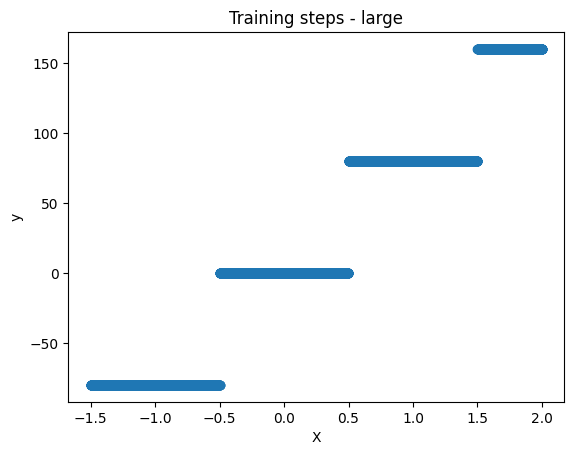

In [12]:
plot(X_train_st_l, y_train_st_l, 'Training steps - large')

In [13]:
hidden_weights = np.array([[550,550,550,550,550]])
hidden_bias = np.array([[275, -275,-275,-825,-825]])

output_weights = np.array([[80],[40],[40],[40],[40]])
output_bias = np.array([[-80]])


network = NeuralNetworkForVisuals(X_train_st_l.shape[1],5,1,hidden_weights,hidden_bias,output_weights,output_bias)

y_pred_train, hidden_layer_output = network.forward(X_train_st_l)

mse_val = mse(y_pred_train, y_train_st_l)
print("Błąd średniokwadratowy (MSE) dla zbioru treningowego:", mse_val)


Błąd średniokwadratowy (MSE) dla zbioru treningowego: 3.796509159113264


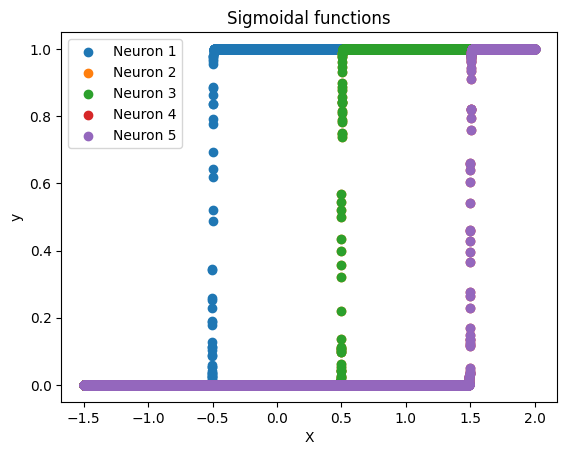

In [14]:
plot_sigmoids(X_train_st_l, hidden_layer_output)

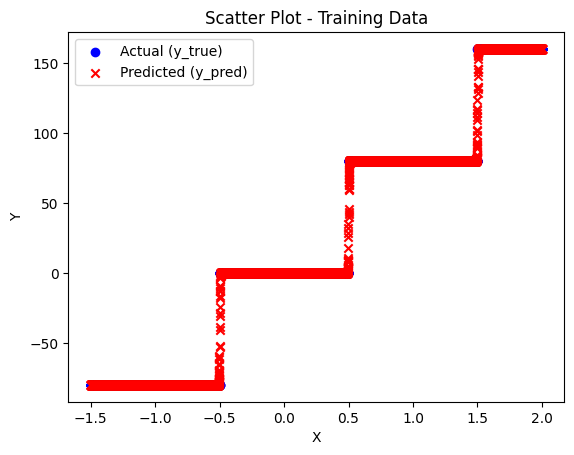

In [15]:
plot_scatter(X_train_st_l, y_train_st_l, y_pred_train, title="Scatter Plot - Training Data")


In [16]:
y_pred_test, hidden_layer_output = network.forward(X_test_st_l)

mse_val = mse(y_pred_test, y_test_st_l)

print("Błąd średniokwadratowy (MSE) dla zbioru testowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru testowego: 4.307871616653174


##### Zbiór square-simple

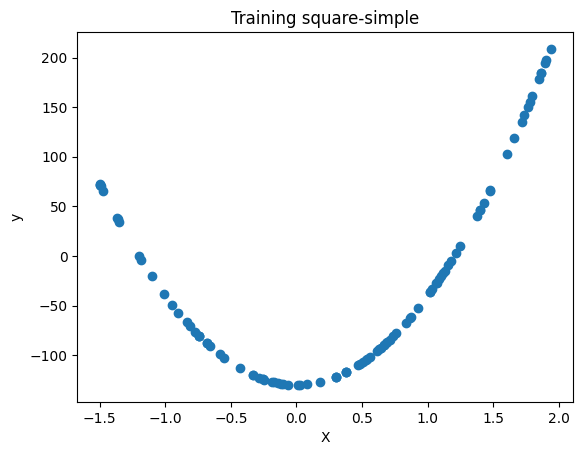

In [17]:
plot(X_train_sq_s, y_train_sq_s, 'Training square-simple')

In [18]:
hidden_weights = np.array([[4.1,2,-4,-3.01,0]])
hidden_bias = np.array([[-10,-3,-5,-2,7]])
output_weights = np.array([[375],[472],[189.9],[104],[-169]])
output_bias = np.array([[0]])

network = NeuralNetworkForVisuals(X_train_sq_s.shape[1],5,1,hidden_weights,hidden_bias,output_weights,output_bias)

y_pred_train, hidden_layer_output = network.forward(X_train_sq_s)

mse_val = mse(y_pred_train, y_train_sq_s)

print("Błąd średniokwadratowy (MSE) dla zbioru treningowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru treningowego: 7.107663231792449


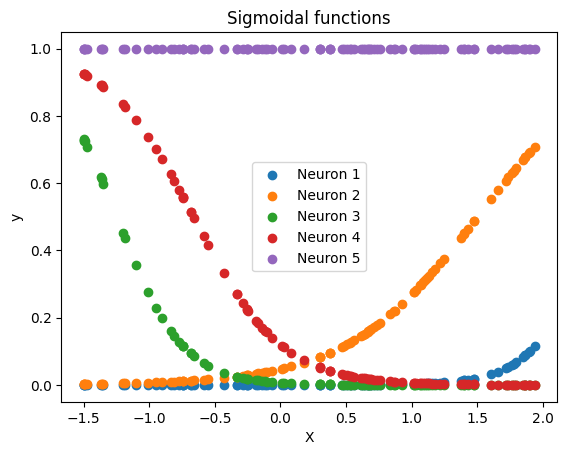

In [19]:
plot_sigmoids(X_train_sq_s, hidden_layer_output)

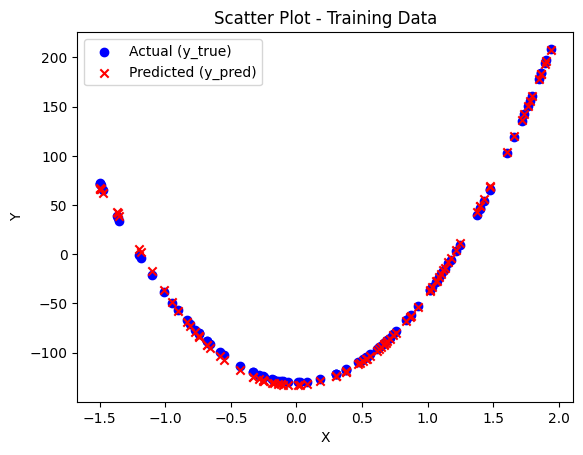

In [20]:
plot_scatter(X_train_sq_s, y_train_sq_s, y_pred_train, title="Scatter Plot - Training Data")

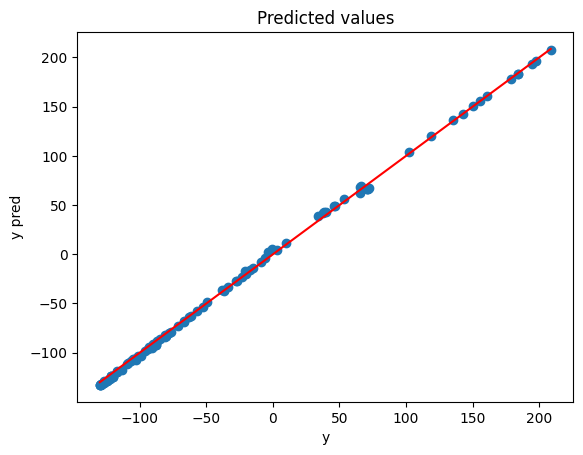

In [21]:
plot_y_y_pred(y_train_sq_s, y_pred_train)

In [22]:
y_pred_test, hidden_layer_output = network.forward(X_test_sq_s)

mse_val = mse(y_pred_test, y_test_sq_s)

print("Błąd średniokwadratowy (MSE) dla zbioru testowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru testowego: 7.886637396889147


### Jedna warstwa ukryta, 10 neuronów

##### Zbiór steps-large

In [23]:
hidden_weights = np.array([[550,550,550,550,550,550,550,550,550,550]])
hidden_bias = np.array([[275,275,-275,-275,-275,-825,-825,-825,-825,-825]])

output_weights = np.array([[40],[40],[26.6],[26.6],[26.6],[16],[16],[16],[16],[16]])
output_bias = np.array([[-80]])

network = NeuralNetworkForVisuals(X_train_st_l.shape[1],10, 1,hidden_weights,hidden_bias,output_weights,output_bias)


y_pred_train, hidden_layer_output = network.forward(X_train_st_l)


mse_val = mse(y_pred_train, y_train_st_l)

print("Błąd średniokwadratowy (MSE) dla zbioru treningowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru treningowego: 3.81964831147679


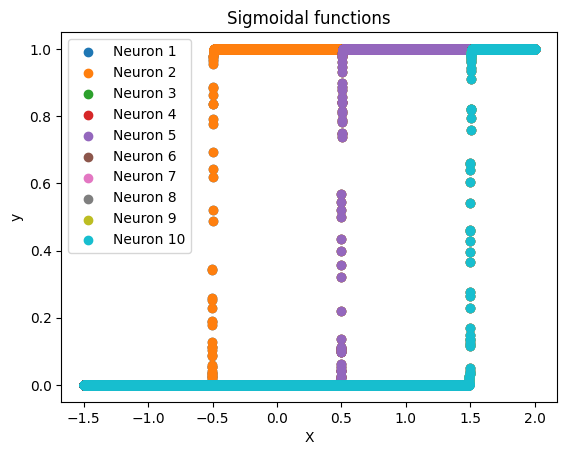

In [24]:
plot_sigmoids(X_train_st_l, hidden_layer_output)

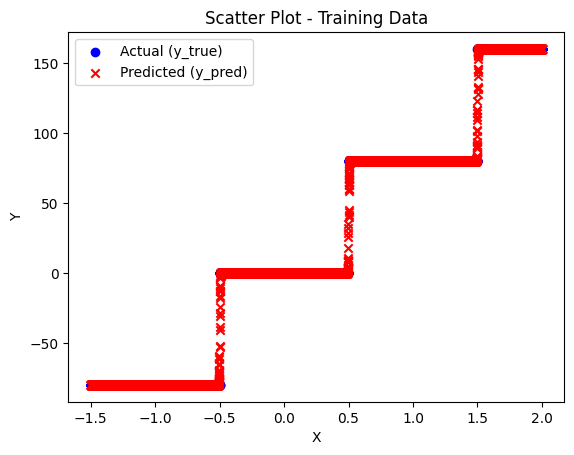

In [25]:
plot_scatter(X_train_st_l, y_train_st_l, y_pred_train, title="Scatter Plot - Training Data")

In [26]:
y_pred_test, hidden_layer_output = network.forward(X_test_st_l)

mse_val = mse(y_pred_test, y_test_st_l)

print("Błąd średniokwadratowy (MSE) dla zbioru testowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru testowego: 4.34578385689489


##### Zbiór square-simple

In [27]:
hidden_weights = np.array([[3,0.7,1.5,2,3,-3,-0.5,-1.5,-2,-3]])
hidden_bias = np.array([[-3.3,-3.8,-4.1,-4.9,-5.9,-3.3,-3.8,-4.1,-4.9,-5.9]])

output_weights = np.array([[180],[180],[180],[180],[180],[180],[180],[180],[180],[180]])
output_bias = np.array([[-158]])


network = NeuralNetworkForVisuals(X_train_sq_s.shape[1], 10, 1,hidden_weights,hidden_bias,output_weights,output_bias)

y_pred_train, hidden_layer_output = network.forward(X_train_sq_s)


mse_val = mse(y_pred_train, y_train_sq_s)

print("Błąd średniokwadratowy (MSE) dla zbioru treningowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru treningowego: 6.800043061688103


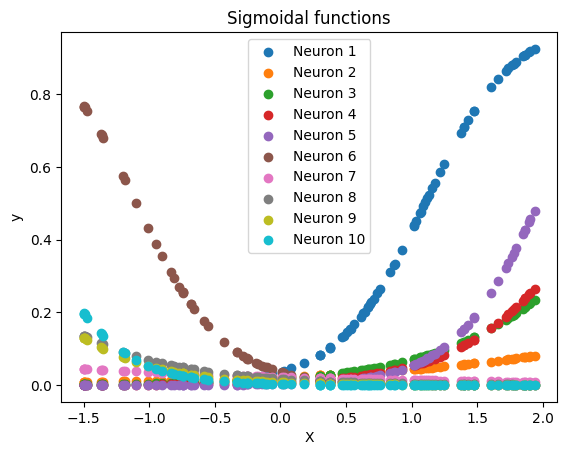

In [28]:
plot_sigmoids(X_train_sq_s, hidden_layer_output)

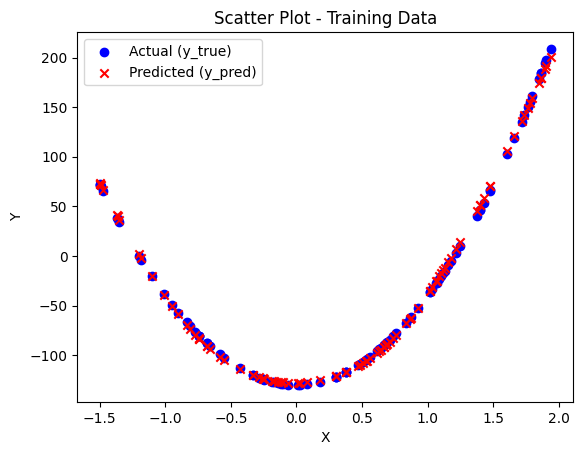

In [29]:
plot_scatter(X_train_sq_s, y_train_sq_s, y_pred_train, title="Scatter Plot - Training Data")

In [30]:
y_pred_test, hidden_layer_output = network.forward(X_test_sq_s)

mse_val = mse(y_pred_test, y_test_sq_s)

print("Błąd średniokwadratowy (MSE) dla zbioru testowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru testowego: 7.336642941501717


### Dwie sieci ukryte, po 5 neuronów na każdej

#### Właściwa funkcja NeuralNetwork

W klasie tej można podać dowolną liczbę warstw ukrytych oraz ilość znajdujących się w nich neuronów. Posiada ona również możliwość wyboru innej funkcji aktywacji niż sigmoidalna
W tej klasie nie ma już wizualizacji sigmoid, z powodu możliwości więcej niż 1 warstw ukrytych.

In [57]:
class NeuralNetwork:
    def __init__(self, hidden_weights, hidden_bias, output_weights, output_bias=0):
        self.hidden_weights = hidden_weights
        self.hidden_bias = hidden_bias
        self.output_weights = output_weights
        self.output_bias = output_bias

    def __function_type(self, x, function_name):
        if function_name == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif function_name == 'relu':
            return np.maximum(0, x)
        else:
            return x

    def forward(self, x, function_name='sigmoid', layer=0):
        return self.__function_type(np.dot(x, [self.hidden_weights[layer]]) + [self.hidden_bias[layer]], function_name)

    def predict(self, x):
        current_layer = x

        for i in range(len(self.hidden_weights)):
            current_layer = (self.forward(current_layer, 'sigmoid', i))

        return np.dot(current_layer, self.output_weights.transpose()) + self.output_bias
        

In [32]:
import numpy as np

def mse(y, y_pred):
    y_flat = np.ravel(y)
    y_pred_flat = np.ravel(y_pred)
    return np.mean((y_pred_flat - y_flat)**2)

##### Zbiór steps-large

In [33]:
hidden_weights = [np.array([[100000, 20000, 40000, 0, 0]]),
    np.array([[50,0,0,0,0],
               [0,40,0,0,0],
               [1.4,0,50,0,0],
               [0,0,0,50,0],
               [0,0,0,0,50]]),]

hidden_bias = [np.array([[-150000, -10000, 20000, 0, 0]]),
    np.array([[-2.81,-30,-0.6,0,0]])]

output_bias = np.array([[-251]])
output_weights = np.array([[100,80,100,80,50]])

network = NeuralNetwork(hidden_weights, hidden_bias, output_weights, output_bias)

y_pred_train = network.predict(X_train_st_l)

In [34]:
mse_val = mse(y_pred_train, y_train_st_l)

print("Błąd średniokwadratowy (MSE) dla zbioru treningowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru treningowego: 2.036506738889041


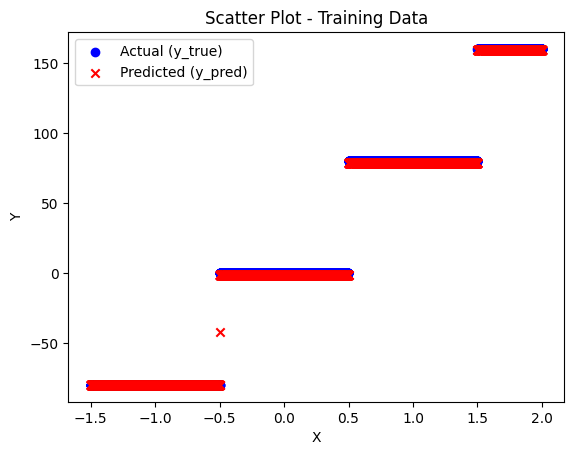

In [35]:
plot_scatter(X_train_st_l, y_train_st_l, y_pred_train, title="Scatter Plot - Training Data")

In [36]:
y_pred_test = network.predict(X_test_st_l)

mse_val = mse(y_pred_test, y_test_st_l)

print("Błąd średniokwadratowy (MSE) dla zbioru testowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru testowego: 1.2300802548172247


##### Zbiór square-simple

In [37]:
hidden_weights = [np.array([[-1, 1, 9, 9, 0]]),
    np.array([[4,0,0,0,0],
               [0,4,0,0,0],
               [0,0,4,0,0],
               [0,0,0,50,0],
               [0,0,0,0,0]])]

hidden_bias = [np.array([[ -4.8,-4.8,-15,-20,0]]),
    np.array([[0,0,0,0,0]])]

output_bias = np.array([[-10022.5]])


output_weights = np.array([[9800,9751,-38,-40, 0]])


network = NeuralNetwork(hidden_weights, hidden_bias, output_weights, output_bias)

In [38]:
y_pred_train = network.predict(X_train_sq_s)

In [39]:
mse_val = mse(y_pred_train, y_train_sq_s)

print("Błąd średniokwadratowy (MSE) dla zbioru treningowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru treningowego: 7.464028687068637


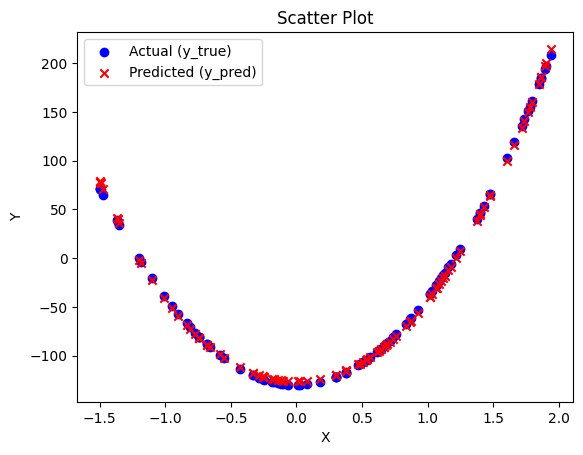

In [40]:
plot_scatter(X_train_sq_s, y_train_sq_s, y_pred_train)

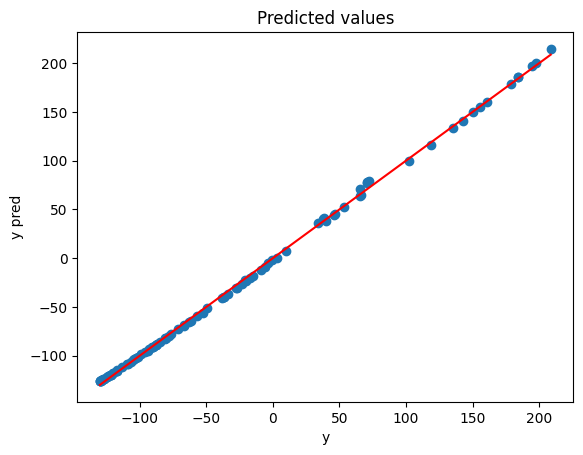

In [41]:
plot_y_y_pred(y_train_sq_s, y_pred_train)

In [42]:
y_pred_test = network.predict(X_test_sq_s)

mse_val = mse(y_pred_test, y_test_sq_s)

print("Błąd średniokwadratowy (MSE) dla zbioru testowego:", mse_val)

Błąd średniokwadratowy (MSE) dla zbioru testowego: 6.701690034545383


## Wnioski

W zadaniu ważne było zrozumienie, jak zachowuje się funkcja sigmoidalna oraz kombinacja liniowa funkcji sigmoidalych przy zmianie parametrów: wag oraz biasów.


Przy jednej warstwie ukrytej dopasowanie parametrów, tak aby otrzymać jak najmniejsze MSE jest o wiele mniej czasochłonne, niż zrobienie tego dla większej ilości warstw ukrytych.

# inne

In [43]:
import numpy as np

def normalize_data(data):
    means = np.mean(data, axis=0)
    std_devs = np.std(data, axis=0)

    # Check for zero standard deviations to avoid division by zero
    std_devs[std_devs == 0] = 1.0

    normalized_data = (data - means) / std_devs

    normalization_params = list(zip(means, std_devs))

    return normalized_data, normalization_params

def denormalize_data(normalized_data, normalization_params):
    
    means, std_devs = zip(*normalization_params)

    denormalized_data = normalized_data * std_devs + means

    return denormalized_data

# Example usage:
# Assuming your_data is a NumPy array in the specified format
your_data = np.array([[ -0.17154266, -127.35158048],
                      [ -0.189, -127.2318048],
                      [ -0.32154266, -127.9898048]])

# Separate x and y values
x_values = your_data[:, 0]
y_values = your_data[:, 1]

# Normalize the data
normalized_data, normalization_params = normalize_data(your_data)

# Example: Use the normalized data for feeding into a neural network

# Denormalize the data back to its original scale
denormalized_data = denormalize_data(normalized_data, normalization_params)

# Check if denormalized_data is similar to your_data
print(np.allclose(denormalized_data, your_data))

# Separate denormalized x and y values
denormalized_x_values = denormalized_data[:, 0]
denormalized_y_values = denormalized_data[:, 1]

True


In [44]:
import numpy as np

def normalize_data(data):
    """
    Normalize the input data to a standard range (e.g., between 0 and 1).
    
    Parameters:
    - data: NumPy array or list containing the data to be normalized.
    
    Returns:
    - normalized_data: NumPy array containing the normalized data.
    - normalization_params: Tuple containing the mean and standard deviation
                           used for normalization. These parameters are needed
                           for denormalization.
    """
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    
    # Check for zero standard deviations to avoid division by zero
    std_dev[std_dev == 0] = 1.0
    
    normalized_data = (data - mean) / std_dev
    
    normalization_params = (mean, std_dev)
    
    return normalized_data, normalization_params

def denormalize_data(normalized_data, normalization_params):
    """
    Denormalize the input data using the provided mean and standard deviation.
    
    Parameters:
    - normalized_data: NumPy array or list containing the normalized data.
    - normalization_params: Tuple containing the mean and standard deviation
                           used for normalization.
    
    Returns:
    - denormalized_data: NumPy array containing the denormalized data.
    """
    mean, std_dev = normalization_params
    
    denormalized_data = normalized_data * std_dev + mean
    
    return denormalized_data

# Example usage:
# Assuming your_data is a NumPy array in the specified format
your_data = np.array([[ -0.17154266, -127.35158048],
                      [ -0.189, -127.2318048],
                      [ -0.32154266, -127.9898048]])

# Normalize the data
normalized_data, normalization_params = normalize_data(your_data)

# Example: Use the normalized data for feeding into a neural network

# Denormalize the data back to its original scale
denormalized_data = denormalize_data(normalized_data, normalization_params)

# Check if denormalized_data is similar to your_data
print(np.allclose(denormalized_data, your_data))
normalized_data
denormalized_data 

True


array([[  -0.17154266, -127.35158048],
       [  -0.189     , -127.2318048 ],
       [  -0.32154266, -127.9898048 ]])

In [74]:
class NeuralNetwork:
    def __init__(self, hidden_weights, hidden_bias, output_weights, output_bias=0):
        self.hidden_weights = hidden_weights
        self.hidden_bias = hidden_bias
        self.output_weights = output_weights
        self.output_bias = output_bias

    def __function_type(self, x, function_name):
        if function_name == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif function_name == 'relu':
            return np.maximum(0, x)
        else:
            return x

    def forward(self, x, function_name='sigmoid', layer=0):
        k = np.dot(x, [self.hidden_weights[layer]]) + [self.hidden_bias[layer]]
        print('Before sigmoid:\n', k)
        return self.__function_type(np.dot(x, [self.hidden_weights[layer]]) + [self.hidden_bias[layer]], function_name)

    def predict(self, x):
        current_layer = x

        for i in range(len(self.hidden_weights)):
            print('Current_layer: ',i, ':\n', current_layer)
            current_layer = (self.forward(current_layer, 'sigmoid', i))
        print('Current_layer after sigmoid:\n', current_layer)
        return np.dot(current_layer, self.output_weights.transpose()) + self.output_bias

In [75]:
hidden_weights = [np.array([[-0.13135968,
         0.8042798 ,
         0.76565419,
         0.84071882,
        -0.94748126]])]

hidden_bias = [np.array([[0,0,0 ,0 ,0]])]

output_bias = np.array([[0]])


output_weights = np.array([[-0.98543661,  0.34051677,  0.60447055, -0.54269443,  0.26840899]])


network = NeuralNetwork(hidden_weights, hidden_bias, output_weights, output_bias)


In [71]:
print(X_train_sq_s)

[[-0.17154266]
 [ 0.02520055]
 [-1.36899138]
 [ 1.9073897 ]
 [ 0.01112937]
 [ 1.85151809]
 [ 1.60714217]
 [ 0.73992569]
 [ 1.89838314]
 [ 0.66593373]
 [-0.33300476]
 [-0.28638113]
 [-0.10530106]
 [ 1.24642471]
 [-1.36372228]
 [ 1.12078385]
 [ 0.87046891]
 [-0.90057484]
 [-0.58619213]
 [ 0.30044527]
 [ 0.86462546]
 [ 1.93986019]
 [ 1.15840494]
 [ 0.48270948]
 [ 1.47391401]
 [-0.83684123]
 [-0.55049685]
 [ 1.3985547 ]
 [ 0.92621687]
 [-0.65809341]
 [-1.34953921]
 [-1.00832317]
 [-0.74265105]
 [ 0.17789497]
 [-0.8090638 ]
 [ 1.01774543]
 [-1.47240341]
 [-0.18578512]
 [ 0.30042698]
 [-1.49450306]
 [ 0.53561401]
 [-0.94733177]
 [-0.24340093]
 [ 0.75971157]
 [ 1.21538177]
 [ 0.47276395]
 [-0.6820381 ]
 [-1.18506819]
 [-1.20035777]
 [-0.43173571]
 [ 0.8359928 ]
 [-1.49916386]
 [-0.77000515]
 [ 1.76561945]
 [ 1.73975662]
 [ 1.06933005]
 [-0.33424806]
 [ 0.30272165]
 [ 1.10391126]
 [ 0.66705734]
 [ 0.69185871]
 [-0.73994806]
 [-0.74201441]
 [-0.1386924 ]
 [ 1.79859492]
 [ 1.86912805]
 [ 1.08949

In [79]:
y_pred_train = network.predict(X_train_sq_s[1,:])

Current_layer:  0 :
 [0.02520055]
Before sigmoid:
 [[[-0.00331034  0.02026829  0.0192949   0.02118657 -0.02387705]]]
Current_layer after sigmoid:
 [[[0.49917242 0.5050669  0.50482358 0.50529645 0.49403102]]]


In [80]:
y_pred_train

array([[[-0.15638724]]])

a:
 [[-0.17154266]]
b:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
w:
 [[-0.13135968]
 [ 0.8042798 ]
 [ 0.76565419]
 [ 0.84071882]
 [-0.94748126]]
i_sig:
 0
z after i:
 [[ 0.02253379]
 [-0.13796829]
 [-0.13134236]
 [-0.14421914]
 [ 0.16253345]]
a after i:
 [[0.50563321]
 [0.46556254]
 [0.46721153]
 [0.46400758]
 [0.54054415]]
b:
 [[0.]]
w:
 [[-0.98543661  0.34051677  0.60447055 -0.54269443  0.26840899]]
i_lin:
 1
z after i:
 [[-0.16404943]]
a after i:
 [[-0.16404943]]

In [46]:
X_normalized, params_x = normalize_data(X_train_sq_s)

In [47]:
X_denormalized = denormalize_data(X_normalized,params_x)

In [48]:
print(np.allclose(X_denormalized, X_train_sq_s))

True


In [49]:
Y_normalized, params_y = normalize_data(y_train_sq_s)

In [51]:
y_pred_train_denormalized = denormalize_data(y_pred_train, params_y)

In [52]:


mse_val = mse(y_pred_train_denormalized, y_train_sq_s)

print("Błąd średniokwadratowy (MSE) dla zbioru treningowego:", mse_val)

# [array([[0.58128616],
#        [0.59772656],
#        [0.90530979],
#        [0.2282734 ],
#        [0.47585382]]), array([[0.76736847, 0.42388484, 0.39178604, 0.70511633, 0.64769731]])]
# 
# print(biases_1)
# [array([[0.01175017],
#        [0.00630339],
#        [0.0051621 ],
#        [0.0116022 ],
#        [0.01014948]]), array([[0.06854161]])]

Błąd średniokwadratowy (MSE) dla zbioru treningowego: 29356.230638211575


In [53]:
hidden_weights = [np.array([[100000, 20000, 40000, 0, 0]]),
    np.array([[50,0,0,0,0],
               [0,40,0,0,0],
               [1.4,0,50,0,0],
               [0,0,0,50,0],
               [0,0,0,0,50]]),]

hidden_bias = [np.array([[-150000, -10000, 20000, 0, 0]]),
    np.array([[-2.81,-30,-0.6,0,0]])]

output_bias = np.array([[-251]])
output_weights = np.array([[100,80,100,80,50]])

network = NeuralNetwork(hidden_weights, hidden_bias, output_weights, output_bias)

y_pred_train = network.predict(X_train_st_l)